<a href="https://colab.research.google.com/github/SethupathyM/Toronto_Parking_Ticket_Analysis/blob/main/Toronto_Parking_Ticket_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**About Parking Tickets:**

Approximately 2.8 million parking tickets are issued annually across the City of Toronto. This dataset contains non-identifiable information relating to each parking ticket issued for each calendar year. The tickets are issued by Toronto Police Services (TPS) personnel as well as persons certified and authorized to issue tickets by TPS. This data set contains complete records only. Incomplete records in the city database are not included in the data set. Incomplete records may exist due to a variety of reasons e.g., the vehicle registration is out-of-province, tickets paid prior to staff entering the ticket data, etc. The volume of incomplete records relative to the overall volume is low and therefore presents insignificant impact to trend analysis.



**Question:**

Use your data analytics skills to derive insights that may be useful for the transit authorities (aka the clients). You can use any of or all of SQL, EXCEL, Python, Power BI, Tableau, or any tools that you can use to analyze and present the outcome.**

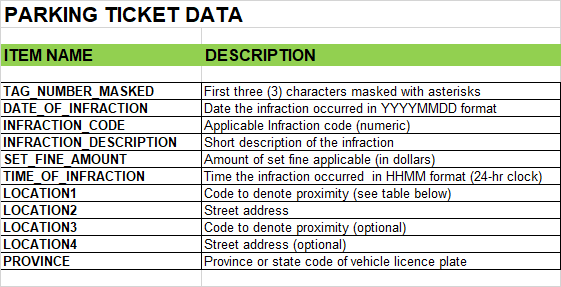

In [4]:
# Importing required Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import calendar

In [5]:
# Drive mount
from google.colab import drive
drive.mount('/content/My_drive')

Mounted at /content/My_drive


In [6]:
# Reading multiple dataset 
df1 = pd.read_csv('/content/My_drive/MyDrive/AIDAS_Tech/Toronto_Parking_Ticket_Analysis/Parking_Tags_Data_2020.000.csv')
df2 = pd.read_csv('/content/My_drive/MyDrive/AIDAS_Tech/Toronto_Parking_Ticket_Analysis/Parking_Tags_Data_2020.001.csv')
df3 = pd.read_csv('/content/My_drive/MyDrive/AIDAS_Tech/Toronto_Parking_Ticket_Analysis/Parking_Tags_Data_2020.002.csv')
df4 = pd.read_csv('/content/My_drive/MyDrive/AIDAS_Tech/Toronto_Parking_Ticket_Analysis/Parking_Tags_Data_2020.003.csv')
df5 = pd.read_csv('/content/My_drive/MyDrive/AIDAS_Tech/Toronto_Parking_Ticket_Analysis/Parking_Tags_Data_2020.004.csv')
df6 = pd.read_csv('/content/My_drive/MyDrive/AIDAS_Tech/Toronto_Parking_Ticket_Analysis/Parking_Tags_Data_2020.005.csv')

In [7]:
# shape
print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)
print(df5.shape)

(249999, 11)
(250000, 11)
(250000, 11)
(250000, 11)
(250000, 11)


In [8]:
# Concating all five dataset
df = pd.concat([df1, df2, df3, df4, df5],axis = 0)

In [9]:
# Shape
df.shape

(1249999, 11)

In [10]:
# Head
df.head()

,tag_number_masked,date_of_infraction,infraction_code,infraction_description,set_fine_amount,time_of_infraction,location1,location2,location3,location4,province
0,***60020,20200101,3,PARK ON PRIVATE PROPERTY,30,1.0,NaN,4700 JANE ST,NaN,NaN,SK
1,***46473,20200101,29,PARK PROHIBITED TIME NO PERMIT,30,2.0,OPP,573 CLENDENAN AVE,NaN,NaN,ON
2,***46474,20200101,29,PARK PROHIBITED TIME NO PERMIT,30,2.0,NR,573 CLENDENAN AVE,NaN,NaN,ON
3,***46475,20200101,29,PARK PROHIBITED TIME NO PERMIT,30,4.0,NR,21 MARIA ST,NaN,NaN,ON
4,***46674,20200101,29,PARK PROHIBITED TIME NO PERMIT,30,4.0,NR,164 GLENHOLME AVE,NaN,NaN,ON


In [11]:
df.dtypes

tag_number_masked          object
date_of_infraction          int64
infraction_code             int64
infraction_description     object
set_fine_amount             int64
time_of_infraction        float64
location1                  object
location2                  object
location3                  object
location4                  object
province                   object
dtype: object

In [12]:
#Replacing empty char with NaN
df = df.replace('',np.NaN)

In [13]:
# Sum of Null values
df.isna().sum()

tag_number_masked               0
date_of_infraction              0
infraction_code                 0
infraction_description          0
set_fine_amount                 0
time_of_infraction           1134
location1                  157658
location2                      74
location3                 1161473
location4                 1161109
province                        0
dtype: int64

In [14]:
# Function to calculate percentage of Null and Non-Null values in Features
def pie_chart_null(valuesh,colors,title,explode):
  valuesh= valuesh
  labelh = ['Null', 'Non-Null']
  plt.pie(valuesh ,labels=labelh , radius=1,explode = explode,colors=colors ,textprops={'fontsize': 13}, autopct='%0.2f%%',shadow=True,startangle=90)
  plt.rcParams['figure.figsize']=(5,4)
  plt.title(title,fontsize = 12)
  plt.show()

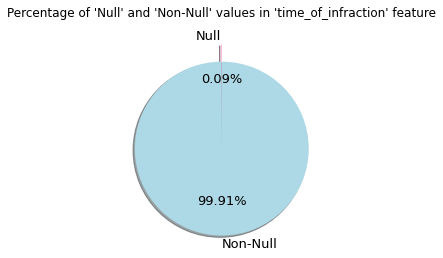

In [15]:
# Function to calculate percentage of Null and Non-Null values in 'time_of_infraction' feature

pie_chart_null([df['time_of_infraction'].isna().sum(), len(df)],['hotpink','lightblue'],"Percentage of 'Null' and 'Non-Null' values in 'time_of_infraction' feature",[0,0.2])

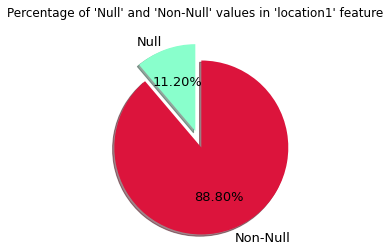

In [16]:
# Function to calculate percentage of Null and Non-Null values in 'location1' feature

pie_chart_null([df['location1'].isna().sum(), len(df)],['#89ffcc','crimson'],"Percentage of 'Null' and 'Non-Null' values in 'location1' feature",[0,0.2])

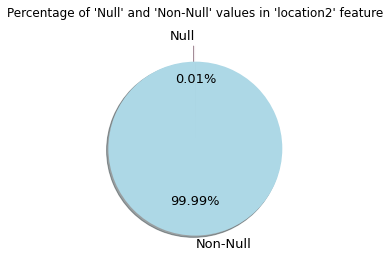

In [17]:
# Function to calculate percentage of Null and Non-Null values in 'location2' feature

pie_chart_null([df['location2'].isna().sum(), len(df)],['hotpink','lightblue'],"Percentage of 'Null' and 'Non-Null' values in 'location2' feature",[0,0.2])

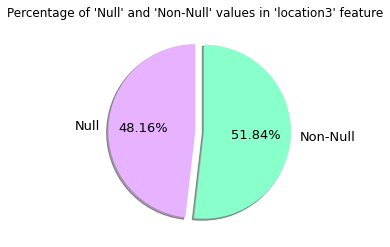

In [18]:
# Function to calculate percentage of Null and Non-Null values in 'location3' feature

pie_chart_null([df['location3'].isna().sum(), len(df)],['#e7b2ff','#89ffcc'],"Percentage of 'Null' and 'Non-Null' values in 'location3' feature",[0,0.1])

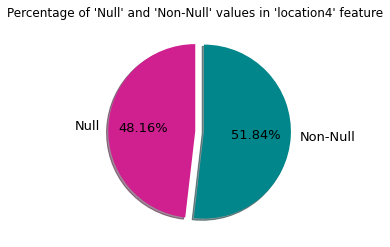

In [19]:
# Function to calculate percentage of Null and Non-Null values in 'location4' feature

pie_chart_null([df['location4'].isna().sum(), len(df)],['#D02090','#00868B'],"Percentage of 'Null' and 'Non-Null' values in 'location4' feature",[0,0.1])

# **Null Values**

# Feature **'Location3'** and **'Location4'** has **48%** of Null values. These features cannot be significant to the dataset.

In [20]:
# Dropping the observations with 'Null' values in 'time_of_infraction' feature 
df.dropna(axis=0,subset = ['time_of_infraction'],inplace = True)

In [21]:
df.sort_values(['date_of_infraction','time_of_infraction'], inplace = True)

In [22]:
# Data type of the given features.
df.dtypes

tag_number_masked          object
date_of_infraction          int64
infraction_code             int64
infraction_description     object
set_fine_amount             int64
time_of_infraction        float64
location1                  object
location2                  object
location3                  object
location4                  object
province                   object
dtype: object

In [23]:
# # Converting the data type of 'date_of_infraction' to date
df['date_of_infraction'] = pd.to_datetime(df['date_of_infraction'], format = '%Y%m%d')


In [24]:
# Filtering
df = df[(df['time_of_infraction'] <= 2359) & (df['time_of_infraction'] > 0)]

In [25]:
# converting to integer datatype 
df['time_of_infraction'] = df['time_of_infraction'].apply(lambda x: int(x))

In [26]:
# converting to String datatype 
df['time_of_infraction'] = df['time_of_infraction'].apply(lambda x: str(x))

In [27]:
# Applying Zfill to get HH:MM format 
df['time_of_infraction'] = df['time_of_infraction'].apply(lambda x: x.zfill(4))

In [28]:
# Checking for minutes greater than 59
df['check'] = df['time_of_infraction'].apply(lambda x : True if int(x[-2]) > 5 else False)
df[df['check'] == True]

,tag_number_masked,date_of_infraction,infraction_code,infraction_description,set_fine_amount,time_of_infraction,location1,location2,location3,location4,province,check
109390,***65365,2020-10-26,3,PARK ON PRIVATE PROPERTY,30,0160,NaN,NaN,NaN,NaN,ON,True


In [29]:
# Replacing the time appropriately
df['time_of_infraction'] = df['time_of_infraction'].replace('0160','0200')

In [30]:
# Converting the data type of 'date_of_infraction' to date
df['Time'] = pd.to_datetime(df['time_of_infraction'], format='%H%M').dt.time

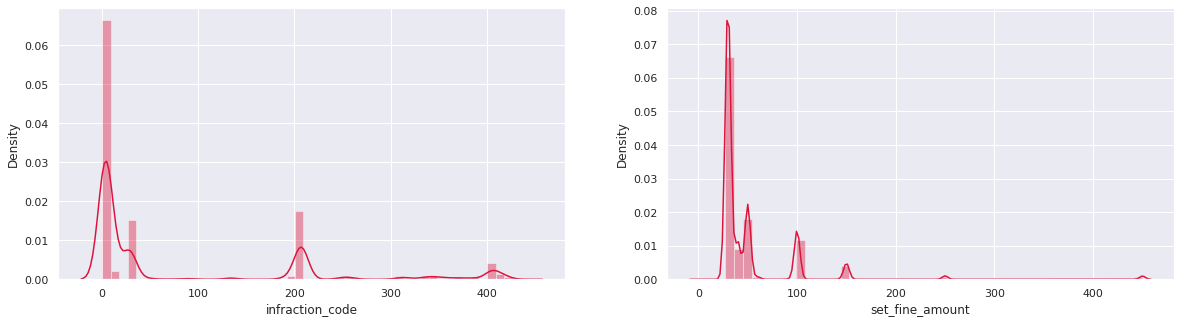

In [31]:
# Distribution plot for numerical variables
lst_dist = ['infraction_code', 'set_fine_amount']
plt.figure(figsize = (20,5))
sns.set_theme()
for i in enumerate(lst_dist):
  sns.set(font_scale = 1)
  plt.subplot(1, 2,i[0]+1)
  sns.distplot(df[i[1]],color = 'crimson')

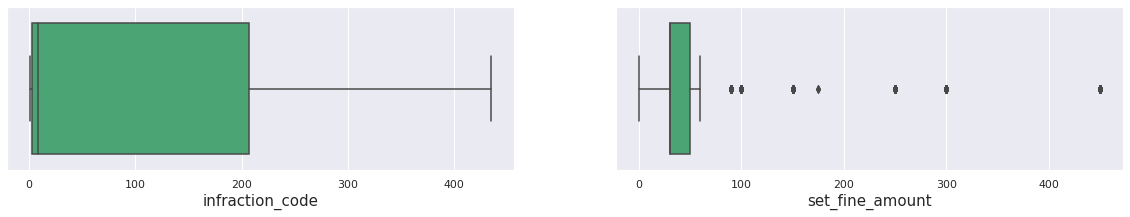

In [32]:
# Box plot
lst_box = ['infraction_code', 'set_fine_amount']
plt.figure(figsize = (20,3))
sns.set_theme()
for i in enumerate(lst_box):
    plt.subplot(1, 2,i[0]+1)
    sns.set(font_scale = 1)
    sns.boxplot(df[i[1]],color='mediumseagreen')
    plt.xlabel(i[1],fontsize=15)

In [33]:
# Function to create Bar plot
def bar_plot(x,y,color,title,xlabel,ylabel,xfig,yfig):
  plt.figure(figsize = (xfig,yfig))
  plt.bar(x,y,color = color)
  plt.title(title, fontsize=14)
  plt.xlabel(xlabel, fontsize=16)
  plt.ylabel(ylabel, fontsize=16)
  plt.show()

In [34]:
# Counting Number of Infraction for each Province
prov_count = df['province'].value_counts().reset_index()

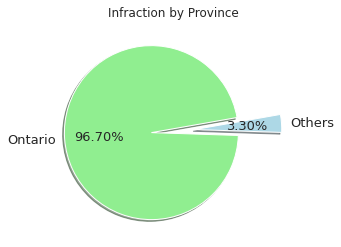

In [35]:
# Pie chart for Infraction by Province
valuesh= [prov_count['province'].iloc[:1]/len(df)*100, 100 - prov_count['province'].iloc[:1]/len(df)*100]
labelh = ['Ontario', 'Others']
plt.pie(valuesh ,labels=labelh , radius=1,textprops={'fontsize': 13},explode = [0.25,0.25],colors = ['lightgreen','lightblue'], autopct='%0.2f%%',shadow=True,startangle=10)
plt.rcParams['figure.figsize']=(5,4)
plt.title('Infraction by Province',fontsize = 12)
plt.show()

# **Key takeaways from Pie chart**

# Almost **97%** percent of Infractions were happened in **Ontario** Province. So Transit authorities should focus more on Ontario province.

In [36]:
# Extracting month names
df['month'] = pd.to_datetime(df['date_of_infraction'], format = '%Y%m%d').dt.month

In [37]:
# Counting Number of Infraction for each month
month_counts = df['month'].value_counts().reset_index()

In [38]:
# Extracting Month name from Month number
month_counts['name'] = month_counts['index'].apply(lambda x : calendar.month_name[x])

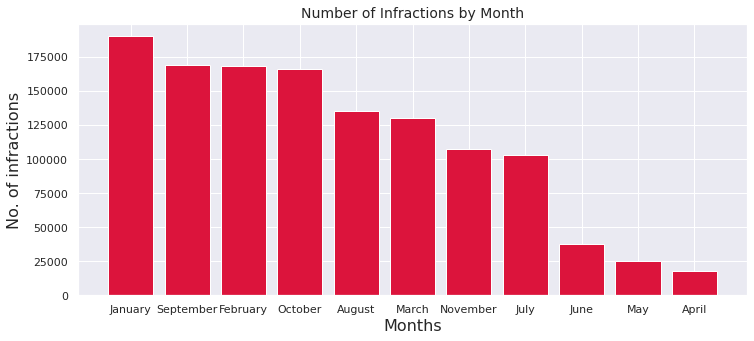

In [39]:
# Bar plot for Number of Infractions by Month
bar_plot(month_counts['name'],month_counts['month'],'crimson','Number of Infractions by Month','Months','No. of infractions',12,5)

# **Key takeaways from Bar plot**

# More number of Infractions occured during **start** and **end** of the year. There is strong reason for that Lets visualize that in upcoming analysis.

In [40]:
# Fine amount by month
f_month = df.groupby('month').agg({'set_fine_amount':'mean'}).reset_index()
f_month.sort_values(by='set_fine_amount',ascending = False,inplace=True)

# Extracting Month name from Month number
f_month['name'] = f_month['month'].apply(lambda x : calendar.month_name[x])

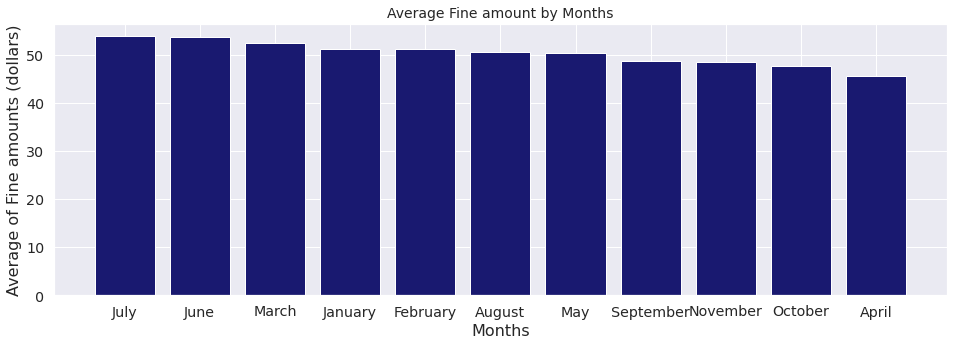

In [82]:
# Bar plot for Sum of Set Fine amount by Month
bar_plot(f_month['name'],f_month['set_fine_amount'],'midnightblue','Average Fine amount by Months','Months','Average of Fine amounts (dollars)',16,5)

# **Key takeaways from Bar plot**

# Average fine amount is high during July and June months

In [42]:

parking_des_counts = df['infraction_description'].value_counts().reset_index()

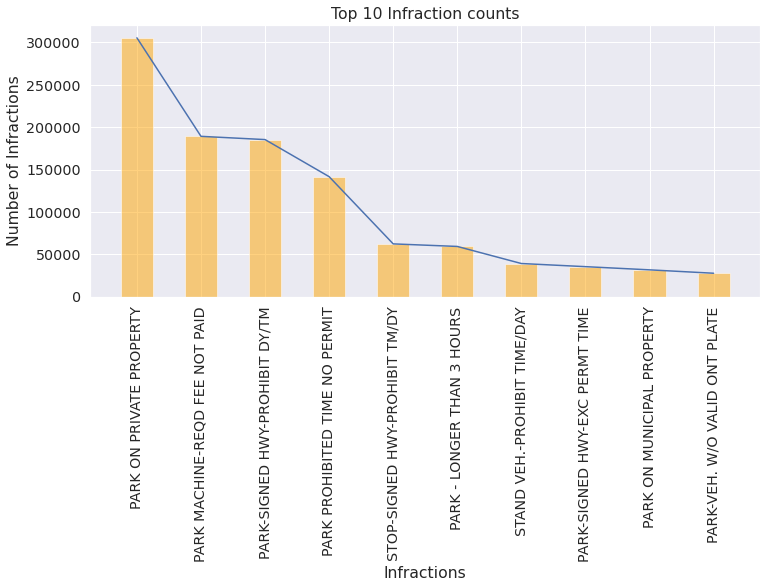

In [83]:
#Top 10 Infraction description
plt.figure(figsize = (12,5))
plt.plot(parking_des_counts.iloc[:10,:]['index'],parking_des_counts.iloc[:10,:]['infraction_description'], "-b")
plt.bar(parking_des_counts.iloc[:10,:]['index'],parking_des_counts.iloc[:10,:]['infraction_description'], width=0.5, alpha=0.5, color='orange')
plt.xticks(rotation=90)
plt.title('Top 10 Infraction counts')
plt.xlabel('Infractions')
plt.ylabel('Number of Infractions')
plt.show()

# **Key takeaways**

# **'PARK ON PRIVATE PROPERTY'** was the most common infraction type with the count of **0.32M**.

In [45]:
# Extracting Day names
df['date_of_infraction'] = pd.to_datetime(df['date_of_infraction'], format = '%Y%m%d')
df['day'] = df['date_of_infraction'].dt.day_name()

In [46]:
day_counts = df['day'].value_counts().reset_index()
day_counts['id'] = [3,2,4,5,1,6,0]
day_counts = day_counts.sort_values('id')

Text(0.5, 1.0, 'Number of Infractions per day of the Week')

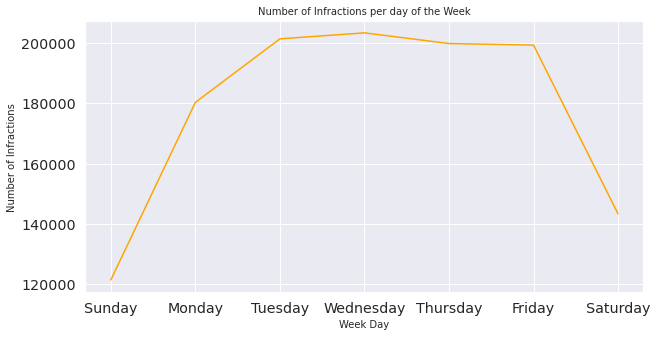

In [78]:
# Line plot for Number of Infractions per day of the Week
plt.figure(figsize = (10,5))
sns.lineplot(data = day_counts, x = 'index', y = 'day',color = 'orange')
plt.xlabel('Week Day',fontsize=10)
plt.ylabel('Number of Infractions',fontsize=10)
plt.title('Number of Infractions per day of the Week',fontsize=10)

# **Key takeaways**

# Number of Infractions are **drastically reducing** during weekends.

In [76]:
day_fine = df.groupby('day').agg({'set_fine_amount':'mean'}).reset_index()
day_fine['id'] = [5,1,6,0,4,2,3]
day_fine = day_fine.sort_values('id')

Text(0.5, 1.0, 'Average of Fine amount per day of the Week')

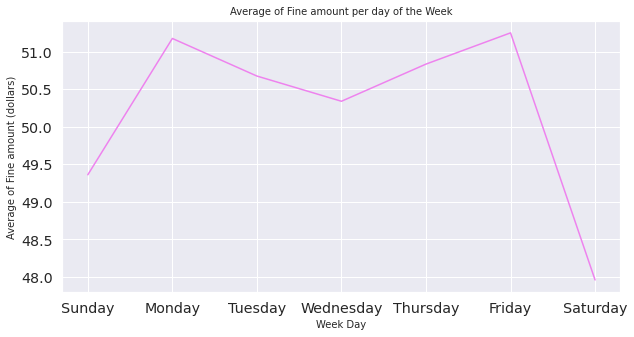

In [84]:
# Line plot for Average of Fine amount per day of the Week
plt.figure(figsize = (10,5))
sns.lineplot(data = day_fine, x = 'day', y = 'set_fine_amount',color = 'violet')
plt.xlabel('Week Day',fontsize=10)
plt.ylabel('Average of Fine amount (dollars)',fontsize=10)
plt.title('Average of Fine amount per day of the Week',fontsize=10)

# **Key takeaways**

# Average of Fine Amount is **peak** at start and end of weekdays.

In [51]:
# Converting Time to string to extract hours
df['Hours'] = df['Time'].apply(lambda x : str(x))
df['Hours'] = df['Hours'].apply(lambda x : x[:2])

In [89]:
def heatmap_desc(desc):
  # Filtering out the dataset with 'PARK ON PRIVATE PROPERTY' infraction description
  des1 = df[df['infraction_description'] == desc]

  # Groupby on 'day' and 'Hours'
  des1 = pd.DataFrame(des1.groupby(['day','Hours']).count()).reset_index()

  # Creating the dataframe with number of 'PARK ON PRIVATE PROPERTY' infraction for each weekday and hour
  d = pd.DataFrame({'Monday':des1[des1['day'] == 'Monday']['tag_number_masked'].to_list(),
                  'Tuesday':des1[des1['day'] == 'Tuesday']['tag_number_masked'].to_list(),
                  'Wednesday':des1[des1['day'] == 'Wednesday']['tag_number_masked'].to_list(),
                  'Thursday':des1[des1['day'] == 'Thursday']['tag_number_masked'].to_list(),
                  'Friday':des1[des1['day'] == 'Friday']['tag_number_masked'].to_list(),
                  'Saturday':des1[des1['day'] == 'Saturday']['tag_number_masked'].to_list(),
                  'Sunday':des1[des1['day'] == 'Sunday']['tag_number_masked'].to_list(),                    
                  })
  d = d.transpose()

  # Heat Map 
  plt.figure(figsize = (15, 5))
  sns.set(font_scale = 1.3)
  sns.heatmap(d, linewidths = 0.5,cmap="Greens")
  plt.title(desc+'(gradient of color resembles count of Infraction per hour of day)')
  plt.yticks(rotation = 0)
  plt.show()

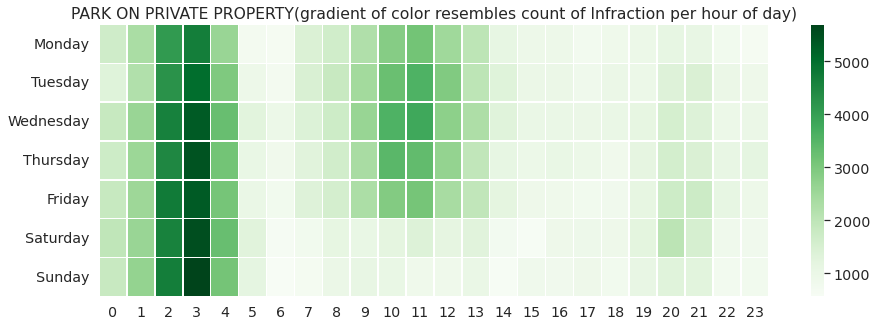

In [90]:
# Heat map for PARK ON PRIVATE PROPERTY description
heatmap_desc('PARK ON PRIVATE PROPERTY')

# **Key takeaways**

# * At hours **2,3** and **4** irrespective of weekdays more infractions happened.
# * At hours **10,11** and **12** only during working days considerably high infractions happened.

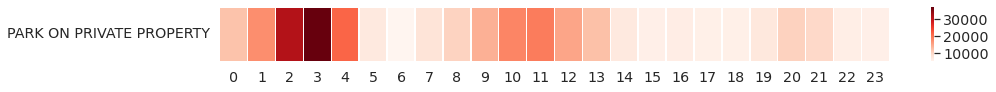

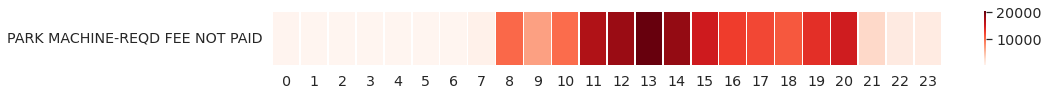

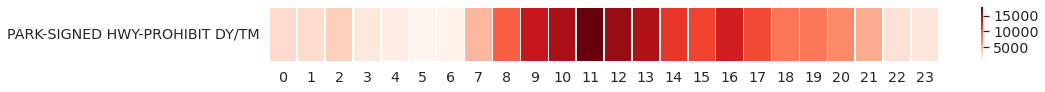

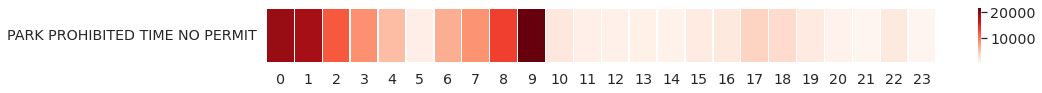

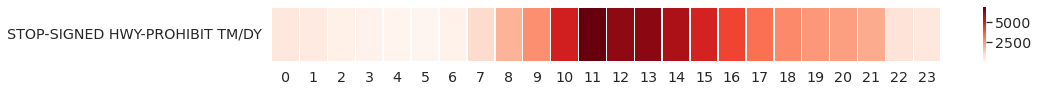

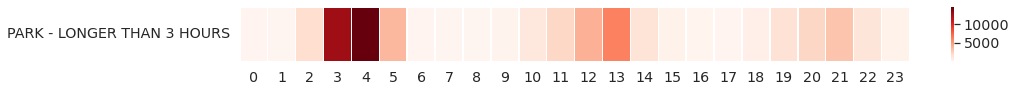

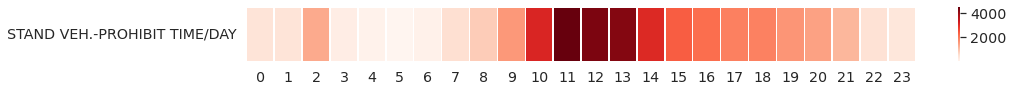

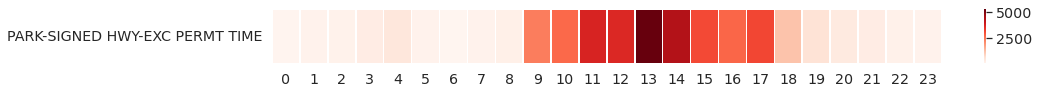

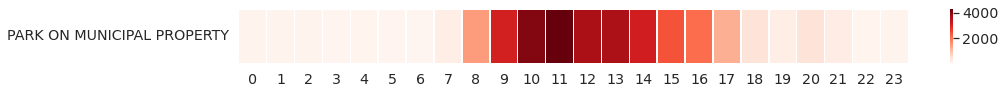

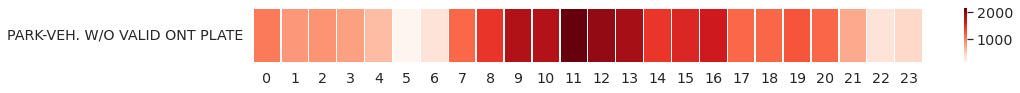

In [54]:
# Groupby on 'infraction_description' and 'Hours'
des1 = pd.DataFrame(df.groupby(['infraction_description','Hours']).count()).reset_index()

#Using For loop to plot heatmap for Top 10 Infraction types with hours
for i in parking_des_counts['index'].iloc[0:10].to_list():
  d = pd.DataFrame({i:des1[des1['infraction_description'] == i]['tag_number_masked'].to_list()})
  d = d.transpose()
  # Heat Map 
  plt.figure(figsize = (15, 1))
  sns.set(font_scale = 1.3)
  sns.heatmap(d, linewidths = 0.5,cmap= 'Reds')
  plt.yticks(rotation = 0)
  plt.show()
  # print(i)

In [55]:
date_counts = df['date_of_infraction'].value_counts().reset_index()
# date_counts['id'] = [3,2,4,5,1,6,0]
# date_counts = day_counts.sort_values('id')

Text(0.5, 1.0, 'Number of Infractions throughtout year')

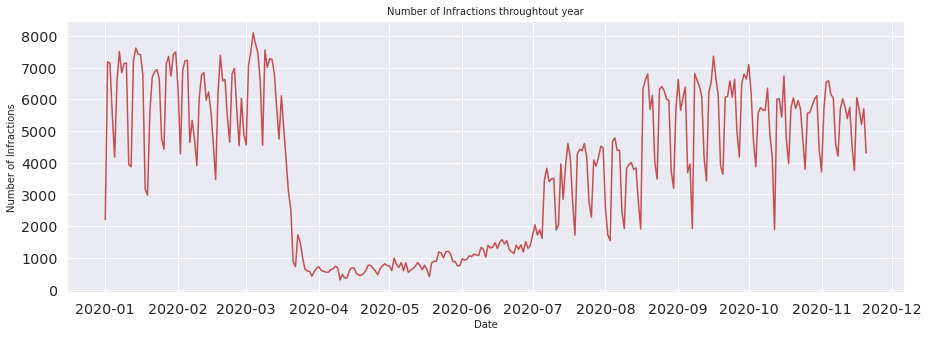

In [56]:
# Line plot for Sum of Fine amount Per weekday
plt.figure(figsize = (15,5))
sns.lineplot(data = date_counts, x = 'index', y = 'date_of_infraction',color = 'r')
plt.xlabel('Date',fontsize=10)
plt.ylabel('Number of Infractions',fontsize=10)
plt.title('Number of Infractions throughtout year',fontsize=10)

# **Key takeaways**

# * We can create new feature 'Covid' with values 'Yes/No' while the dataset is feed to the model as significance difference exists.

# * During **April, May, June** there is significant drop in number of infractions which is due to **COVID-19 lockdown** restrictions.

In [57]:
# Number of unique infraction code and infraction descriptions
print('Unique no of Infraction code       :',df['infraction_code'].nunique())
print('Unique no of Infraction description:',df['infraction_description'].nunique())

Unique no of Infraction code       : 154
Unique no of Infraction description: 164


In [58]:
# DataFrame of Infraction code with Multiple Infraction description
lst = []
for i in df['infraction_code'].unique():
  if df[df['infraction_code'] == i]['infraction_description'].nunique() > 1 :
    lst.append([i,df[df['infraction_code'] == i]['infraction_description'].unique().tolist()])
x = pd.DataFrame(lst,columns=['Infraction_code','Infraction_descriptions'])
x.sort_values(by='Infraction_code', ascending = True, inplace=True)
pd.set_option('display.max_colwidth', -1)
x.head(10)

,Infraction_code,Infraction_descriptions
10,1,"[PARK FAIL TO DEPOSIT FEE METER, PARK-FAIL TO DEPOSIT FEE METER]"
6,2,"[PARK - LONGER THAN 3 HOURS, PARK - LONGER THAN 3 HOURS ]"
0,3,"[PARK ON PRIVATE PROPERTY, PARK PRIVATE PROP NO CONSENT, PARK ON PRIV PROP WITHOUT CONS]"
3,4,"[PARK ON MUNICIPAL PROPERTY, PARK ON MUN PROP NO CONSENT]"
5,5,"[PARK-SIGNED HWY-PROHIBIT DY/TM, PARK-HWY DRNG PROH TIMES/DAYS, PARK HWY AT PROHIB TIME/DAY, PARK HWY PROHIBITED TIMES/DAYS]"
9,6,"[PARK-SIGNED HWY-EXC PERMT TIME, PARK HWY OVER PERMITTED TIME]"
2,8,"[STAND VEH.-PROHIBIT TIME/DAY, PARK-SIGNED HWY-PROHIBIT DY/TM, STAND VEH-HWY-PROH TIME/DAYS, STAND SIGN HWY PRO TIMES/DAYS]"
4,9,"[STOP-SIGNED HWY-PROHIBIT TM/DY, STOP SIGNED HWY PRO TIMES/DAYS]"
1,29,"[PARK PROHIBITED TIME NO PERMIT, PARK VEH ON ST WITHOUT PERMIT, PARK-SIGNED HWY-PROHIBIT DY/TM]"
7,30,"[STOP-(ON/OVER) (SIDEWK/FTPATH), STOP ON/OVER SIDEWALK/FOOTPATH]"


# **Key takeaways**

# As the Unique no of Infraction code and Unique no of Infraction description are different it could make us assume there are multiple descriptions for a Infraction code. But multiple descriptions for a code has literal meaning.

In [59]:
# DataFrame of Fine Amount with Multiple Infraction code
lst = []
for i in df['set_fine_amount'].unique():
  if df[df['set_fine_amount'] == i]['infraction_code'].nunique() >= 1 :
    lst.append([i,df[df['set_fine_amount'] == i]['infraction_code'].unique().tolist()])
x = pd.DataFrame(lst,columns=['set_fine_amount','infraction_code'])
x.sort_values(by='set_fine_amount', ascending = True, inplace=True)
pd.set_option('display.max_colwidth', -1)
x

,set_fine_amount,infraction_code
8,0,"[31, 28, 29, 5, 9, 210, 33, 4, 3, 34, 32, 1, 2, 7, 30, 35, 353, 8, 6, 251, 25, 354, 41]"
10,15,"[13, 12]"
0,30,"[3, 29, 4, 336, 49, 2, 48, 312, 314, 207, 1, 11, 54, 313, 315, 51, 307, 55, 208, 265, 50, 335, 317, 56, 266, 52, 38, 310, 209, 425, 211, 332, 308, 87, 430]"
1,40,"[406, 134, 28, 407, 415, 23, 6, 418, 83, 86, 414, 85, 20, 90, 21, 22, 19, 79, 408, 80, 81]"
3,50,"[5, 14, 16, 337, 339, 77, 338, 18, 342, 17, 340, 8, 29, 341]"
12,55,"[263, 267]"
5,60,"[419, 65, 57, 70, 410, 370, 405, 61, 420, 404, 71, 387, 148, 386, 69, 59, 68, 74, 63, 385, 434, 435, 411]"
9,90,[37]
2,100,"[8, 9, 257, 15, 417, 99, 248, 416, 409, 250, 249, 255]"
7,150,"[192, 30, 384, 403, 383, 31, 320, 423, 402]"


# **Key takeaways**

# From above dataframe we can clearly say that multiple infractions can have same fine amount.

In [60]:
#locations with  Top most infractions
loc = df['location2'].value_counts().reset_index().iloc[:10]

In [61]:
# Creating a dataFrame with Location where most infraction happens
a = df[df['location2'] == '4001 LESLIE ST']['day'].value_counts().reset_index()
# Creating a column 'day_id' to sort rows by week days
a['day_id'] = a['index'].apply(lambda x : 0 if x == 'Sunday' else (1 if x == 'Monday' else (2 if x == 'Tuesday' else (3 if x == 'Wednesday' else (4 if x == 'Thursday' else (5 if x == 'friday' else 6))))))
a.sort_values(by='day_id',inplace=True)
# Instance of dataframe
z = pd.DataFrame({'day':a['index'].tolist(),'4001 LESLIE ST':a['day'].tolist()})
z.set_index('day',inplace=True)
# For loop for Top 10 most infraction happened location
for i in loc['index'].tolist()[1:]:
  a = df[df['location2'] == i]['day'].value_counts().reset_index()
  a['day_id'] = a['index'].apply(lambda x : 0 if x == 'Sunday' else (1 if x == 'Monday' else (2 if x == 'Tuesday' else (3 if x == 'Wednesday' else (4 if x == 'Thursday' else (5 if x == 'friday' else 6))))))
  a.sort_values(by='day_id',inplace=True)
  z[i] = a['day'].tolist()
  a = 0

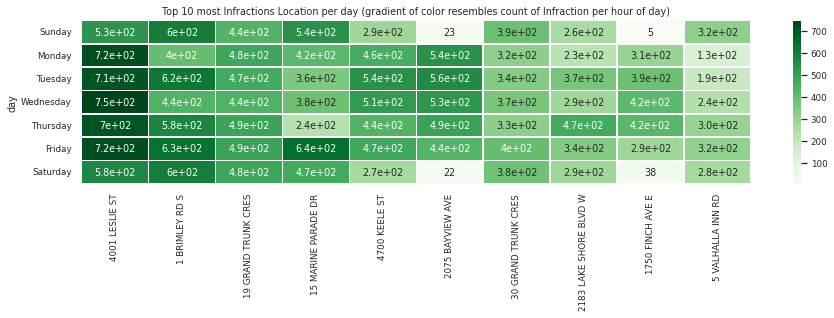

In [93]:
# Heat Map 
plt.figure(figsize = (15, 3))
sns.set(font_scale = 0.8)
sns.heatmap(z,annot = True, linewidths = 0.5,cmap="Greens")
plt.title('Top 10 most Infractions Location per day (gradient of color resembles count of Infraction per hour of day)')
plt.yticks(rotation = 0)
plt.show()

# **Key takeaways**

# * **4001 LESUE ST** location has number of infractions irrespective of weekdays.
# * **15 MARINE PARADE DR** location has high number of infractions during weekends than weekdays. So it is possible that it could be entertainment area.
# * **2075 BAYVIEW AVE** and **1750 FINCH AVE E** where the infractions are very low during weekends.

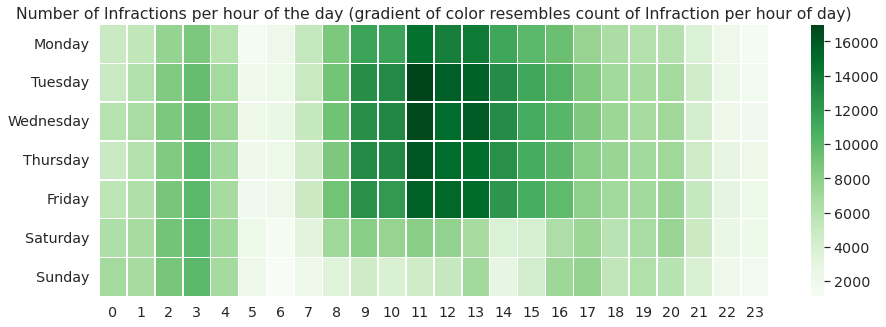

In [94]:
# Heat map of Peak Hours by Week Day
# Groupby on 'day' and 'Hours'
counts = pd.DataFrame(df.groupby(['day','Hours']).count()).reset_index()

# Creating the dataframe with number of 'PARK ON PRIVATE PROPERTY' infraction for each weekday and hour
d_counts = pd.DataFrame({'Monday':counts[counts['day'] == 'Monday']['tag_number_masked'].to_list(),
                  'Tuesday':counts[counts['day'] == 'Tuesday']['tag_number_masked'].to_list(),
                  'Wednesday':counts[counts['day'] == 'Wednesday']['tag_number_masked'].to_list(),
                  'Thursday':counts[counts['day'] == 'Thursday']['tag_number_masked'].to_list(),
                  'Friday':counts[counts['day'] == 'Friday']['tag_number_masked'].to_list(),
                  'Saturday':counts[counts['day'] == 'Saturday']['tag_number_masked'].to_list(),
                  'Sunday':counts[counts['day'] == 'Sunday']['tag_number_masked'].to_list(),                    
                  })
d_counts = d_counts.transpose()

# Heat Map 
plt.figure(figsize = (15, 5))
sns.set(font_scale = 1.3)
sns.heatmap(d_counts, linewidths = 0.5,cmap="Greens")
plt.title('Number of Infractions per hour of the day (gradient of color resembles count of Infraction per hour of day)')
plt.yticks(rotation = 0)
plt.show()

# **Key takeaways**
# In week days **10** to **2** the peak hours were **more** number of infractions occured.

In [64]:
# Filtering out by Peak Hours
peak_hrs = pd.DataFrame(df[(df['Hours'] == '11') | (df['Hours'] == '12') | (df['Hours'] == '13')])

In [65]:
# Sum of Fine amount by 'infraction_code' and 'infraction_description'
phrs = peak_hrs.groupby(['infraction_code','infraction_description']).agg({'set_fine_amount':'sum'}).reset_index()

In [66]:
# sort by fine amount
phrs = phrs.sort_values(by='set_fine_amount',ascending = False).iloc[:5]

In [67]:
# Concating infractio_code and infraction description
phrs['infraction_code'] = phrs['infraction_code'].apply(lambda x :str(x))
phrs['code_desc'] =  phrs['infraction_code'] +','+ phrs['infraction_description']

In [68]:
# Infractio code and Infraction description
code = phrs['code_desc'].tolist()
code.append('others')
lst = []
for i in phrs['set_fine_amount'].tolist():
  lst.append(round((i/df['set_fine_amount'].sum())*100,2))
# print(lst)
lst.append(100 - sum(lst))

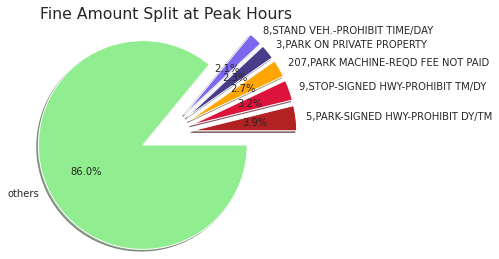

In [69]:
# Pie Chart for Top 5 Fine amount of Infraction code and Infraction descirption at Peak hours

values= lst
labe = code
plt.pie(values ,labels=labe , radius=1.2,textprops={'fontsize': 10}, explode = [0.3,0.3,0.3,0.3,0.3,0.3],colors = ['firebrick','crimson','orange','darkslateblue','mediumslateblue','lightgreen'], autopct='%0.1f%%',shadow=True)
plt.rcParams['figure.figsize']=(9,7)
plt.title('Fine Amount Split at Peak Hours')
plt.show()


# **Key takeaways**

# * **'PARK-SIGNED HWY-PROHIBIT DY/TM'** accounts for almost **4%** of total fine amount
# * **'STOP SIGNED HWY-PROHIBIT TM/DY'** accounts for **3.2%** of total fine amount

In [70]:
# Infractions that could affect the Fire Services
fire_lst = df['infraction_description'].unique().tolist()
for i in fire_lst:
  if 'FIRE' in i:
    print(i)

PARK IN A FIRE ROUTE
PARK-WITHIN 3M OF FIRE HYDRANT
PARK-7.5M FIRE HALL SAME SIDE
PARK-30.5M FIRE HALL OPP SIDE
PARK/LEAVE-FIRE ROUTE


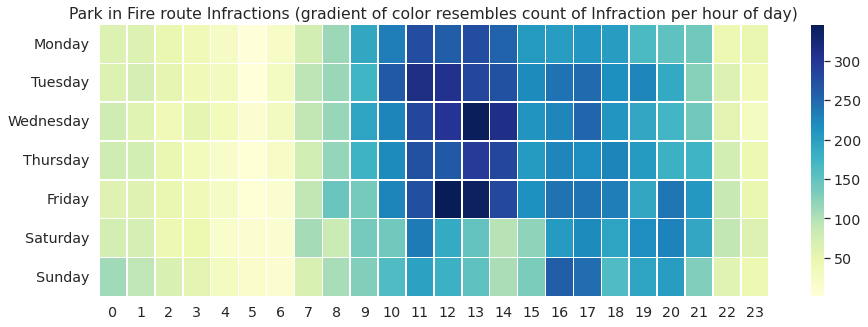

In [95]:
# Heat map of Park in Fire route Infractions by Week Day and Hours
# Groupby on 'day' and 'Hours'
fire = df[(df['infraction_description'] == 'PARK IN A FIRE ROUTE') | (df['infraction_description'] == 'PARK-WITHIN 3M OF FIRE HYDRANT')
| (df['infraction_description'] == 'PARK/LEAVE-FIRE ROUTE')]

counts = pd.DataFrame(fire.groupby(['day','Hours']).count()).reset_index()

# Creating the dataframe with number of 'PARK IN FIRE ROUTE' infraction for each weekday and hour
d_counts = pd.DataFrame({'Monday':counts[counts['day'] == 'Monday']['tag_number_masked'].to_list(),
                  'Tuesday':counts[counts['day'] == 'Tuesday']['tag_number_masked'].to_list(),
                  'Wednesday':counts[counts['day'] == 'Wednesday']['tag_number_masked'].to_list(),
                  'Thursday':counts[counts['day'] == 'Thursday']['tag_number_masked'].to_list(),
                  'Friday':counts[counts['day'] == 'Friday']['tag_number_masked'].to_list(),
                  'Saturday':counts[counts['day'] == 'Saturday']['tag_number_masked'].to_list(),
                  'Sunday':counts[counts['day'] == 'Sunday']['tag_number_masked'].to_list(),                    
                  })
d_counts = d_counts.transpose()

# Heat Map 
plt.figure(figsize = (15, 5))
sns.set(font_scale = 1.3)
sns.heatmap(d_counts, linewidths = 0.5,cmap="YlGnBu")
plt.title('Park in Fire route Infractions (gradient of color resembles count of Infraction per hour of day)')
plt.yticks(rotation = 0)
plt.show()

# **Key takeaways**

# * During week days at hour 10 to 2 high number of **PARKING IN FIRE ROUTE** infractions occurs that could affect the **Fire Service vehicles** in **Fire emergencies**

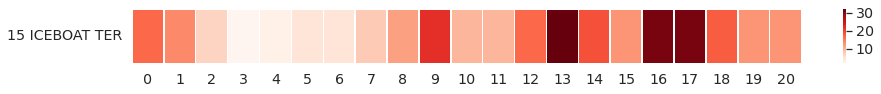

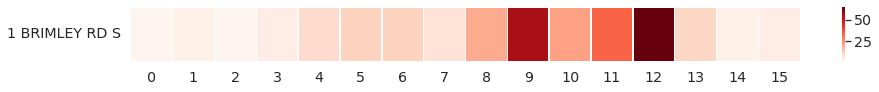

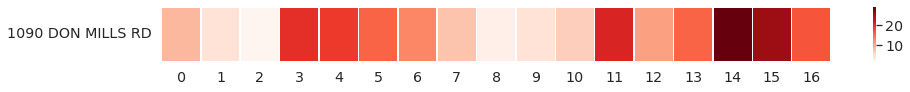

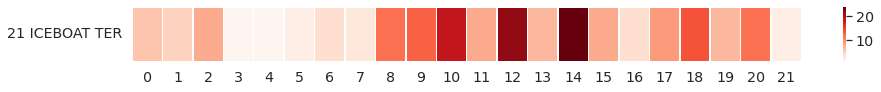

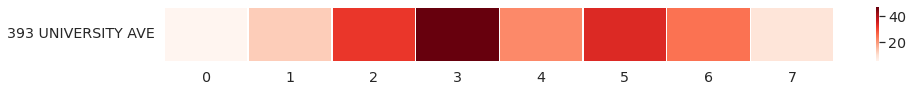

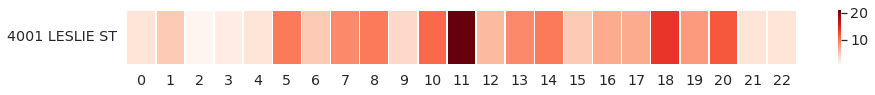

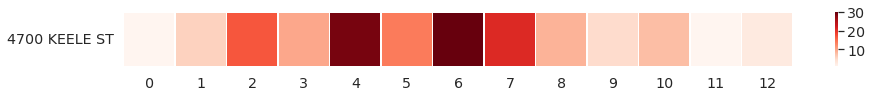

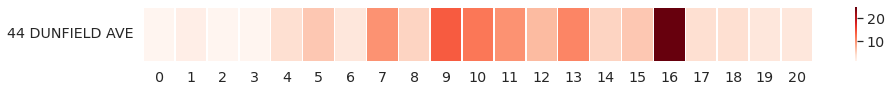

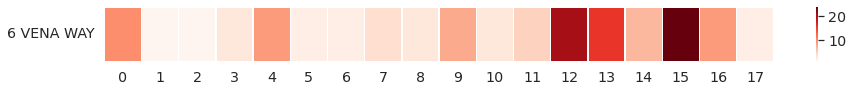

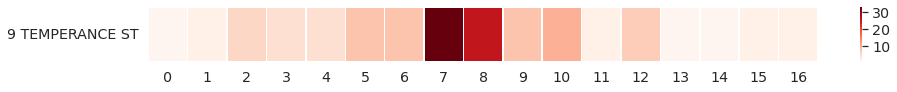

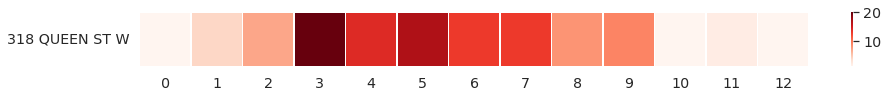

In [72]:
# Groupby on 'infraction_description' and 'Hours'

des1 = pd.DataFrame(fire.groupby(['location2','Hours']).count()).reset_index()

#Using For loop to plot heatmap for Top 10 Infraction types with hours
for i in fire['location2'].value_counts().reset_index()['index'].iloc[:11].tolist():
  d = pd.DataFrame({i:des1[des1['location2'] == i]['tag_number_masked'].to_list()})
  d = d.transpose()
  # Heat Map 
  plt.figure(figsize = (15, 1))
  sns.set(font_scale = 1.3)
  sns.heatmap(d, linewidths = 0.5,cmap= 'Reds')
  plt.yticks(rotation = 0)
  plt.show()
  # print(i)

# **Key takeaways**

#* Transit authorities can give more attention to these locations at Hours the infractions are high to minimize 'PARK IN FIRE ROUTE' Infraction.

In [148]:
# df['street_name'] = df["location2"].str.split(" ", n = 1, expand = False)
# df['street_name'] = df['street_name'].apply(lambda x : list(x))
# df['street_name'] = df['street_name'].apply(lambda x : x[1])

TypeError: ignored

In [146]:
df

,tag_number_masked,date_of_infraction,infraction_code,infraction_description,set_fine_amount,time_of_infraction,location1,location2,location3,location4,province,check,Time,month,day,Hours,street_name
0,***60020,2020-01-01,3,PARK ON PRIVATE PROPERTY,30,0001,NaN,4700 JANE ST,NaN,NaN,SK,False,00:01:00,1,Wednesday,00,'
1,***46473,2020-01-01,29,PARK PROHIBITED TIME NO PERMIT,30,0002,OPP,573 CLENDENAN AVE,NaN,NaN,ON,False,00:02:00,1,Wednesday,00,'
2,***46474,2020-01-01,29,PARK PROHIBITED TIME NO PERMIT,30,0002,NR,573 CLENDENAN AVE,NaN,NaN,ON,False,00:02:00,1,Wednesday,00,'
3,***46475,2020-01-01,29,PARK PROHIBITED TIME NO PERMIT,30,0004,NR,21 MARIA ST,NaN,NaN,ON,False,00:04:00,1,Wednesday,00,'
4,***46674,2020-01-01,29,PARK PROHIBITED TIME NO PERMIT,30,0004,NR,164 GLENHOLME AVE,NaN,NaN,ON,False,00:04:00,1,Wednesday,00,'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,***85120,2020-11-20,415,PARK COMMERC LOAD ZONE NOT LDG,40,1532,NR,124 CUMBERLAND ST,NaN,NaN,ON,False,15:32:00,11,Friday,15,'
249996,***11209,2020-11-20,3,PARK ON PRIVATE PROPERTY,30,1533,NaN,4242 DUNDAS S TW,NaN,NaN,ON,False,15:33:00,11,Friday,15,'
249997,***07210,2020-11-20,363,PARK ONSTRT ACCESSIBLE NO PRMT,450,1533,NR,101 GRENADIER RD,NaN,NaN,ON,False,15:33:00,11,Friday,15,'
249998,***79329,2020-11-20,207,PARK MACHINE-REQD FEE NOT PAID,30,1533,NR,28 GROSVENOR ST,NaN,NaN,ON,False,15:33:00,11,Friday,15,'


**Cat Boost Model**

In [96]:
data = df

In [97]:
data.shape

(1248606, 16)

In [98]:
# Sum of duplicated records
data.duplicated().sum()

0

In [99]:
data.head()

,tag_number_masked,date_of_infraction,infraction_code,infraction_description,set_fine_amount,time_of_infraction,location1,location2,location3,location4,province,check,Time,month,day,Hours
0,***60020,2020-01-01,3,PARK ON PRIVATE PROPERTY,30,0001,NaN,4700 JANE ST,NaN,NaN,SK,False,00:01:00,1,Wednesday,00
1,***46473,2020-01-01,29,PARK PROHIBITED TIME NO PERMIT,30,0002,OPP,573 CLENDENAN AVE,NaN,NaN,ON,False,00:02:00,1,Wednesday,00
2,***46474,2020-01-01,29,PARK PROHIBITED TIME NO PERMIT,30,0002,NR,573 CLENDENAN AVE,NaN,NaN,ON,False,00:02:00,1,Wednesday,00
3,***46475,2020-01-01,29,PARK PROHIBITED TIME NO PERMIT,30,0004,NR,21 MARIA ST,NaN,NaN,ON,False,00:04:00,1,Wednesday,00
4,***46674,2020-01-01,29,PARK PROHIBITED TIME NO PERMIT,30,0004,NR,164 GLENHOLME AVE,NaN,NaN,ON,False,00:04:00,1,Wednesday,00


In [100]:
# Installing Category encoders
! pip install category-encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 72 kB 849 kB/s 


In [101]:
# Installing Catboost
! pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.3 MB/s 


In [102]:
# cat_df_flights_ce = cat_df_flights.copy()

import category_encoders as ce

encoder = ce.BinaryEncoder(cols=['infraction_description','infraction_code'])
data_cat = encoder.fit_transform(data)

data_cat.head()

,tag_number_masked,date_of_infraction,infraction_code_0,infraction_code_1,infraction_code_2,infraction_code_3,infraction_code_4,infraction_code_5,infraction_code_6,infraction_code_7,...,location1,location2,location3,location4,province,check,Time,month,day,Hours
0,***60020,2020-01-01,0,0,0,0,0,0,0,1,...,NaN,4700 JANE ST,NaN,NaN,SK,False,00:01:00,1,Wednesday,00
1,***46473,2020-01-01,0,0,0,0,0,0,1,0,...,OPP,573 CLENDENAN AVE,NaN,NaN,ON,False,00:02:00,1,Wednesday,00
2,***46474,2020-01-01,0,0,0,0,0,0,1,0,...,NR,573 CLENDENAN AVE,NaN,NaN,ON,False,00:02:00,1,Wednesday,00
3,***46475,2020-01-01,0,0,0,0,0,0,1,0,...,NR,21 MARIA ST,NaN,NaN,ON,False,00:04:00,1,Wednesday,00
4,***46674,2020-01-01,0,0,0,0,0,0,1,0,...,NR,164 GLENHOLME AVE,NaN,NaN,ON,False,00:04:00,1,Wednesday,00


In [103]:
# Dropping obervations with Null values
data_cat.dropna(inplace=True)

In [104]:
# Independent variables list
indep_var = data_cat.columns.tolist()

In [105]:
# Removing less significant variables
for i in ['tag_number_masked','set_fine_amount','location3', 'location4','check','day','Time','date_of_infraction', 'location1',
 'location2',
 'province',]:
  indep_var.remove(i)


In [106]:
# Independent and Dependent variables assignment
X = data_cat[indep_var].values
y = data_cat['set_fine_amount'].values

In [107]:
# Defining train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=5)

In [108]:
# Importing Catboost library
import catboost as cb

In [109]:
# Train and Test sets
train_dataset = cb.Pool(X_train, y_train) 
test_dataset = cb.Pool(X_test, y_test)

In [110]:
# Instance the model
model = cb.CatBoostRegressor(loss_function='RMSE')

In [111]:
# Hyperparameter Tunning
grid = {'iterations': [100, 150, 200],
        'learning_rate': [0.03, 0.1],
        'depth': [1,2,3,4],
        'l2_leaf_reg': [0.2, 0.5, 1, 3]}
model.grid_search(grid, train_dataset)

Streaming output truncated to the last 5000 lines.
156:	learn: 23.9522637	test: 23.6352962	best: 23.6352962 (156)	total: 1.17s	remaining: 319ms
157:	learn: 23.9243759	test: 23.6123318	best: 23.6123318 (157)	total: 1.18s	remaining: 313ms
158:	learn: 23.8966575	test: 23.5812607	best: 23.5812607 (158)	total: 1.18s	remaining: 306ms
159:	learn: 23.8796779	test: 23.5661611	best: 23.5661611 (159)	total: 1.19s	remaining: 298ms
160:	learn: 23.8463454	test: 23.5396202	best: 23.5396202 (160)	total: 1.2s	remaining: 290ms
161:	learn: 23.8176268	test: 23.5105922	best: 23.5105922 (161)	total: 1.21s	remaining: 283ms
162:	learn: 23.7980233	test: 23.4897918	best: 23.4897918 (162)	total: 1.21s	remaining: 275ms
163:	learn: 23.7510112	test: 23.4435949	best: 23.4435949 (163)	total: 1.22s	remaining: 268ms
164:	learn: 23.7275630	test: 23.4175633	best: 23.4175633 (164)	total: 1.23s	remaining: 260ms
165:	learn: 23.6696147	test: 23.3524206	best: 23.3524206 (165)	total: 1.23s	remaining: 253ms
166:	learn: 23.62326

{'params': {'depth': 4,
  'l2_leaf_reg': 1,
  'iterations': 200,
  'learning_rate': 0.1},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,

In [118]:
# Importing error metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

pred = model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, pred)))
r2 = r2_score(y_test, pred)
print('Testing performance')
print('RMSE: {:.2f}'.format(rmse))
# print('R2: {:.2f}'.format(r2))
print("Adjusted r2_score: ",round((1-(1-r2_score(y_test, pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))*100,0))


Testing performance
RMSE: 13.85
Adjusted r2_score:  85.0


Text(0.5, 1.0, 'Feature Importance')

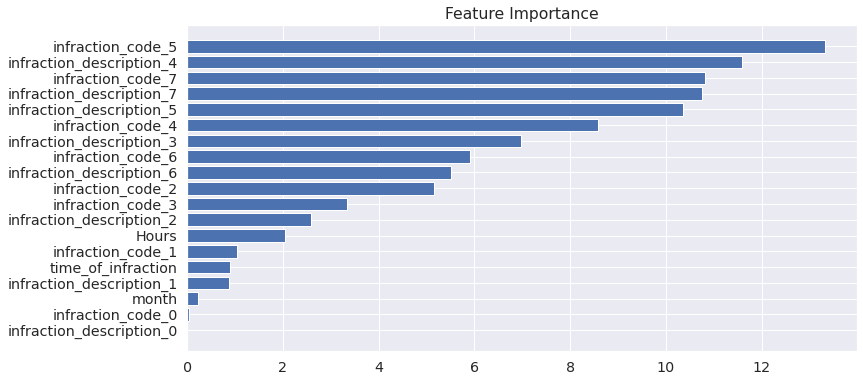

In [113]:
#Feature Importance
feature_importance = model.feature_importances_
feature_sorted = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(feature_sorted)), feature_importance[feature_sorted], align='center')
plt.yticks(range(len(feature_sorted)), np.array(indep_var)[feature_sorted])
plt.title('Feature Importance')

In [114]:
!pip install shap


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 5.3 MB/s 


In [115]:
#Import shap Library
import shap

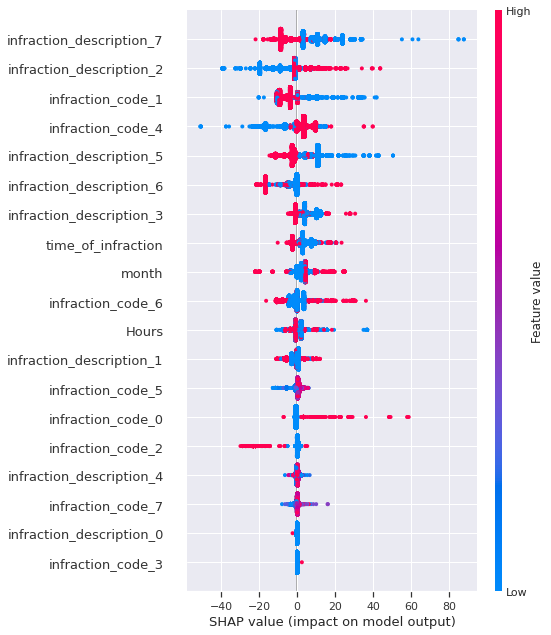

In [116]:
#Shap plot
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, feature_names =  np.array(indep_var)[feature_sorted])